# Lab 10: Розробка класифікатора аналізу клавіатурного почерку користувача з інтерфейсом користувача.
### Шевченко Юлія, ФІ-31мн

### Description

In this lab, we will develop a user authentication system based on keystroke dynamics, a behavioral biometric method. Each individual has a unique typing pattern, and by analyzing the timing of key presses and the intervals between them, we can create a reliable method for verifying user identities.

### Motivation

Traditional authentication methods, such as passwords and PINs, have significant security vulnerabilities. Behavioral biometrics, like keystroke dynamics, offer an additional layer of security by making it harder for unauthorized users to impersonate legitimate ones. This method enhances security without requiring additional hardware.

In [1]:
# All the imports for the task
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

In [2]:
def calculate_student_coef(alpha, degrees_of_freedom, data):
    """
    Calculate student coefficients for each data point in 'data'.

    Parameters:
    - alpha: significance level
    - degrees_of_freedom: degrees of freedom for t-distribution
    - data: list of data points

    Returns:
    - results: list of dictionaries containing calculated results
    """
    # Calculate the critical t-value
    t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)

    results = []

    for i in range(len(data)):
        # Exclude one element at a time
        data_subset = data[:i] + data[i+1:]

        # Calculate mean and standard deviation
        mean = np.mean(data_subset)
        std_dev = np.std(data_subset)

        # Calculate student coefficient
        tt = abs((data[i] - mean) / std_dev)

        # Check if student coefficient exceeds the critical t-value
        significant = tt > t_critical

        # Append results to list
        result = {
            "value_excluded": data[i],
            "mean": mean,
            "standard_deviation": std_dev,
            "student_coefficient": tt,
            "is_significant": significant
        }
        results.append(result)

    return results

In [3]:
def fisher_discriminant_coefficient(X1, X2):
    """
    Calculate Fisher's discriminant coefficient between two datasets X1 and X2.

    Parameters:
    - X1: list of data points for class 1
    - X2: list of data points for class 2

    Returns:
    - ratio of variances S1/S2
    """
    S1 = np.max([np.var(X1), np.var(X2)])
    S2 = np.min([np.var(X1), np.var(X2)])
    
    return S1 / S2

In [4]:
# Example usage:
data1 = (np.random.standard_t(149, size=150) + 0.004).tolist()
data2 = np.random.standard_t(149, size=150).tolist()

In [5]:
# Calculate Fisher's discriminant coefficient
fisher_coefficient = fisher_discriminant_coefficient(data1, data2)
print("Fisher's discriminant coefficient:", fisher_coefficient)

Fisher's discriminant coefficient: 1.1521476754678635


In [6]:
# Calculate t-statistic for two-sample t-test
M_x = np.mean(data1)
M_y = np.mean(data2)
n = 150
S2_x = np.sum((np.array(data1) - M_x) ** 2) / (n - 1)
S2_y = np.sum((np.array(data2) - M_y) ** 2) / (n - 1)
S = np.sqrt((S2_x + S2_y) * (n - 1) / (2 * n - 1))
t_statistic = abs(M_x - M_y) / (S * np.sqrt(2 / n))

In [7]:
# Calculate critical t-value
t_critical = t.ppf(1 - 0.05, 149)

In [8]:
# Print if t-statistic is greater than t_critical
print("t-statistic:", t_statistic)
print("Is t-statistic greater than t_critical?", t_statistic > t_critical)

t-statistic: 1.901194182312229
Is t-statistic greater than t_critical? True


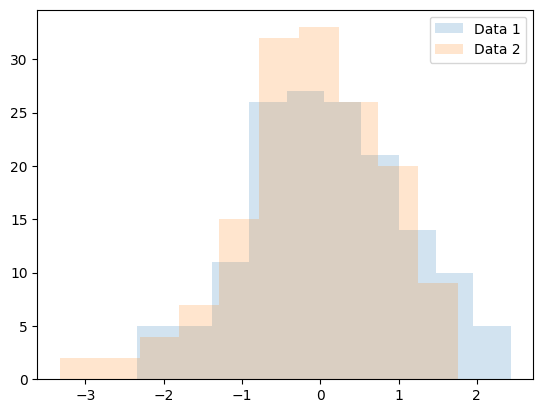

In [9]:
# Plot histograms
plt.hist(data1, alpha=0.2, label='Data 1')
plt.hist(data2, alpha=0.2, label='Data 2')
plt.legend()
plt.show()

## Conclusion

This Python script performs several statistical computations and visualizations using NumPy, SciPy, and Matplotlib libraries. Here's an overview of what the code achieves:

1. **Student Coefficient Calculation**:
   - The `calculate_student_coef` function calculates student coefficients for a dataset. It iterates through each data point, excluding one at a time, computes the mean and standard deviation of the remaining data, and determines whether the excluded data point significantly deviates from the mean based on a critical t-value. This helps in identifying outliers or influential observations in the dataset.

2. **Fisher's Discriminant Coefficient**:
   - The `fisher_discriminant_coefficient` function computes Fisher's discriminant coefficient between two datasets (`data1` and `data2`). This coefficient is a measure of how well two classes (represented by the datasets) can be distinguished from each other based on their variances. It helps in feature selection or dimensionality reduction tasks in machine learning and pattern recognition.

3. **Two-Sample t-Test**:
   - The script also calculates the t-statistic for a two-sample t-test between `data1` and `data2`. It then compares this statistic against a critical t-value to determine if there is a significant difference between the means of the two datasets at a 5% significance level. This is useful in hypothesis testing to ascertain whether two sets of data have statistically different means.

4. **Visualization**:
   - Finally, the script generates histograms of `data1` and `data2` to visually compare their distributions. This provides a graphical representation of how the two datasets differ or overlap.

### Purpose
This script was created to:
- **Explore Statistical Relationships**: By calculating coefficients like student coefficients and Fisher's discriminant coefficient, the script helps in exploring statistical relationships within datasets.
- **Perform Hypothesis Testing**: The t-statistic calculation and comparison with a critical value enable hypothesis testing to determine if observed differences between datasets are significant.
- **Visualize Data**: Histograms visualize the distribution of data, aiding in understanding their characteristics visually.

By combining statistical calculations with visualization, this script facilitates data exploration and hypothesis testing in scientific research, data analysis, or machine learning applications.
